In [1]:
import pandas as pd
path="dataset.csv"
RawData=pd.read_csv(path,delimiter=',')
RawData

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [2]:
selectedColumns=['raisedhands','VisITedResources','AnnouncementsView','Discussion','ParentAnsweringSurvey','StudentAbsenceDays','ParentschoolSatisfaction','Class']
data=RawData[selectedColumns]
data

,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,StudentAbsenceDays,ParentschoolSatisfaction,Class
0,15,16,2,20,Yes,Under-7,Good,M
1,20,20,3,25,Yes,Under-7,Good,M
2,10,7,0,30,No,Above-7,Bad,L
3,30,25,5,35,No,Above-7,Bad,L
4,40,50,12,50,No,Above-7,Bad,M
...,...,...,...,...,...,...,...,...
475,5,4,5,8,No,Above-7,Bad,L
476,50,77,14,28,No,Under-7,Bad,M
477,55,74,25,29,No,Under-7,Bad,M
478,30,17,14,57,No,Above-7,Bad,L


In [3]:
import warnings
warnings.filterwarnings("ignore")
data['StudentAbsenceDays'].unique()
data.replace({'Under-7':0,'Above-7':1},inplace=True)
data.replace({'No':0,'Yes':1},inplace=True)
data.replace({'M':1,'L':0,'H':2},inplace=True)
data.replace({'Good':1,'Bad':0},inplace=True)
data.replace({'Mum':1,'Father':0},inplace=True)
data

,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,StudentAbsenceDays,ParentschoolSatisfaction,Class
0,15,16,2,20,1,0,1,1
1,20,20,3,25,1,0,1,1
2,10,7,0,30,0,1,0,0
3,30,25,5,35,0,1,0,0
4,40,50,12,50,0,1,0,1
...,...,...,...,...,...,...,...,...
475,5,4,5,8,0,1,0,0
476,50,77,14,28,0,0,0,1
477,55,74,25,29,0,0,0,1
478,30,17,14,57,0,1,0,0


In [4]:
import numpy as np
random_row=data.sample(n=1).iloc[0, :-1]
random_index = random_row.name
random_row = np.array(random_row).reshape(1,-1)
print(random_index)
#16

433


## DATA ANALYSIS

In [5]:
print(RawData.info())      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

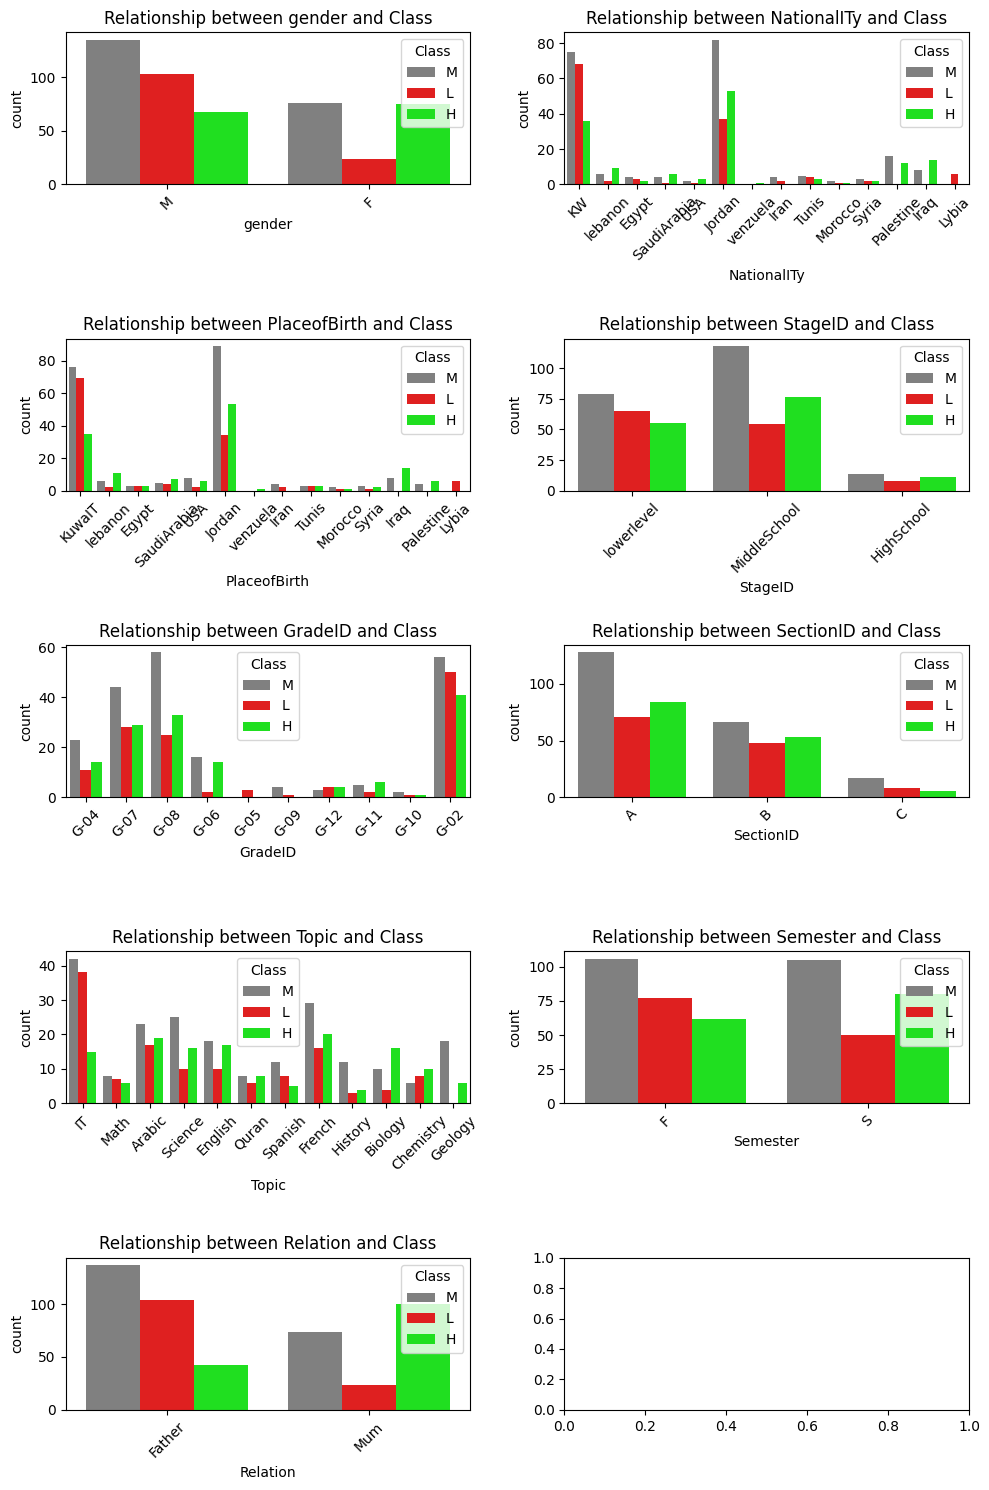

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
# List of categorical columns to plot
categorical_columns = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation']

# Set up a grid for subplots
num_columns = len(categorical_columns)
num_rows = (num_columns + 1) // 2  # Ensure at least 1 row, rounding up
fig, axes = plt.subplots(num_rows, 2, figsize=(10, 3 * num_rows))  # Adjust figsize for smaller graphs

# Flatten the 2D array of subplots
axes = axes.flatten()


for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, hue='Class', data=RawData, palette={'H': 'lime', 'M': 'grey', 'L': 'red'}, ax=axes[i])
    axes[i].set_title(f'Relationship between {column} and Class')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility


plt.tight_layout(h_pad=2, w_pad=2)

plt.show()


In the columns mentioned above, we can't establish a clear relationship between them and the target variable, we will be removing all these features as they may affect the accuracy. Now let's move on to the numerical columns.

In [7]:
melt = pd.melt(RawData,id_vars='Class',value_vars=['raisedhands','VisITedResources','AnnouncementsView','Discussion'])
melt

,Class,variable,value
0,M,raisedhands,15
1,M,raisedhands,20
2,L,raisedhands,10
3,L,raisedhands,30
4,M,raisedhands,40
...,...,...,...
1915,L,Discussion,8
1916,M,Discussion,28
1917,M,Discussion,29
1918,L,Discussion,57


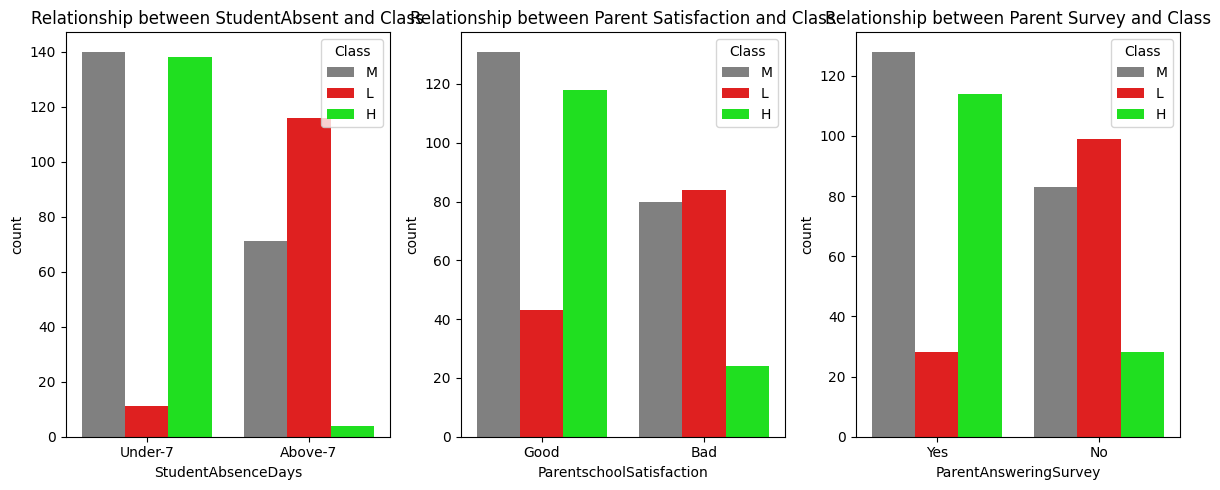

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))


sns.countplot(x='StudentAbsenceDays', hue='Class', data=RawData, palette={'H': 'lime', 'M': 'grey', 'L': 'red'}, ax=axes[0])
axes[0].set_title('Relationship between StudentAbsent and Class')


sns.countplot(x='ParentschoolSatisfaction', hue='Class', data=RawData, palette={'H': 'lime', 'M': 'grey', 'L': 'red'}, ax=axes[1])
axes[1].set_title('Relationship between Parent Satisfaction and Class')

sns.countplot(x='ParentAnsweringSurvey',hue='Class',data=RawData,palette={'H': 'lime', 'M': 'grey', 'L': 'red'}, ax=axes[2])
axes[2].set_title('Relationship between Parent Survey and Class')


plt.tight_layout()

plt.show()

AS you can see,StudentAbsenceDays is an important feature to select cause it is directly affecting the Class variable.

## LOGISTIC REGRESSION

In [9]:
logCopy=data.copy()
x=logCopy.iloc[:,:-1]
y=logCopy.iloc[:,-1]

In [10]:
Features=(logCopy.columns.tolist())
Features.remove('Class')
Target=logCopy['Class']
print(Target)

0      1
1      1
2      0
3      0
4      1
      ..
475    0
476    1
477    1
478    0
479    0
Name: Class, Length: 480, dtype: int64


In [11]:
from sklearn.model_selection  import train_test_split 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, classification_report, accuracy_score
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=52)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
logiScore = accuracy_score(y_test,y_pred)
logiReport = classification_report(y_test,y_pred)
Logirmse=pow(mean_squared_error(y_test,y_pred),0.5)

In [12]:
print(y_pred)

[0 1 0 0 1 0 2 2 1 1 1 0 2 0 2 0 2 1 2 1 2 2 0 0 2 0 2 1 2 0 1 2 0 2 1 1 0
 1 2 0 1 1 2 1 2 0 1 0 1 0 2 2 1 2 1 0 1 0 0 2 0 2 1 1 1 2 0 0 2 1 2 2 2 2
 2 2 1 2 2 2 0 2 1 1 0 1 1 2 1 2 0 1 1 2 2 2]


In [13]:
print(f'score={logiScore}')
print(f'rmse={Logirmse}')
print(logiReport)

score=0.7916666666666666
rmse=0.48947250518628044
              precision    recall  f1-score   support

           0       0.81      0.95      0.88        22
           1       0.81      0.67      0.73        39
           2       0.76      0.83      0.79        35

    accuracy                           0.79        96
   macro avg       0.79      0.82      0.80        96
weighted avg       0.79      0.79      0.79        96



In [14]:
prediction=model.predict(random_row)
print(f"prediction for randomly selected row: {prediction[0]}")
actualValue=logCopy.iloc[random_index,-1]
print(f"actual value for randomly selected row: {actualValue}")

prediction for randomly selected row: 1
actual value for randomly selected row: 1


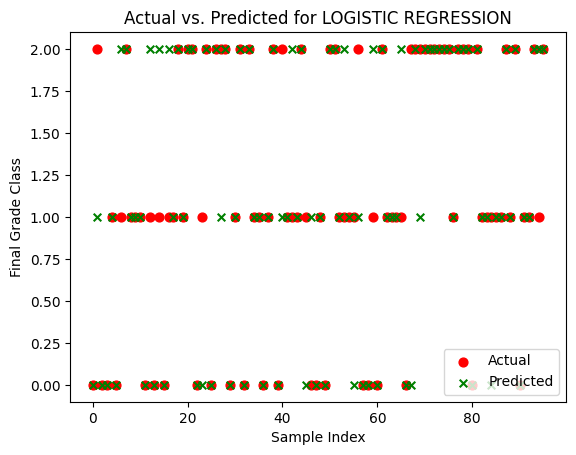

In [15]:
import matplotlib.pyplot as plt
import numpy as np
# Create a scatter plot
plt.scatter(np.arange(len(y_test)), y_test, label='Actual', marker='o',c='r',s=40)
plt.scatter(np.arange(len(y_pred)), y_pred, label='Predicted', marker='x',c='g',s=30)

plt.title('Actual vs. Predicted for LOGISTIC REGRESSION')
plt.xlabel('Sample Index')
plt.ylabel('Final Grade Class')
plt.legend()
plt.show()

## MULTIPLE LINEAR REGRESSION


In [16]:
MLRcopy=data.copy()
x=MLRcopy.iloc[:,:-1]
y=MLRcopy.iloc[:,-1]

In [17]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=52)
model=LinearRegression()
model.fit(X_train,y_train)
intercept=model.intercept_
coeffs=model.coef_
predictions = model.predict(X_test)
# Round the predictions to the nearest integer
y_pred_mlr = np.round(predictions)
mse=mean_squared_error(y_test,y_pred_mlr)
MLRrmse= pow(mse,0.5)
MLRScore = accuracy_score(y_test,y_pred)
MLRReport = classification_report(y_test,y_pred)
print(y_pred_mlr)

[-0.  1. -0.  0.  1.  0.  2.  2.  1.  1.  1. -0.  2.  0.  2.  0.  2.  1.
  2.  1.  2.  2.  0.  0.  2.  0.  2.  1.  2.  0.  1.  1.  0.  2.  1.  1.
  0.  1.  2.  0.  2.  1.  2.  1.  2.  1.  1.  0.  1.  0.  2.  2.  1.  1.
  1.  0.  1.  0. -0.  2.  0.  2.  1.  1.  1.  2.  0.  1.  2.  1.  2.  2.
  2.  2.  2.  2.  1.  2.  2.  1. -0.  2.  1.  1.  0.  1.  1.  2.  1.  2.
  0.  1.  1.  2.  2.  2.]


In [18]:
print(f'score={MLRScore}')
print(f'rmse={MLRrmse}')
print(MLRReport)

score=0.7916666666666666
rmse=0.44487826050130463
              precision    recall  f1-score   support

           0       0.81      0.95      0.88        22
           1       0.81      0.67      0.73        39
           2       0.76      0.83      0.79        35

    accuracy                           0.79        96
   macro avg       0.79      0.82      0.80        96
weighted avg       0.79      0.79      0.79        96



In [19]:
prediction=model.predict(random_row)
print(f"prediction for randomly selected row: {prediction[0]}")
actualValue=logCopy.iloc[random_index,-1]
print(f"actual value for randomly selected row: {actualValue}")

prediction for randomly selected row: 1.5194860646737278
actual value for randomly selected row: 1


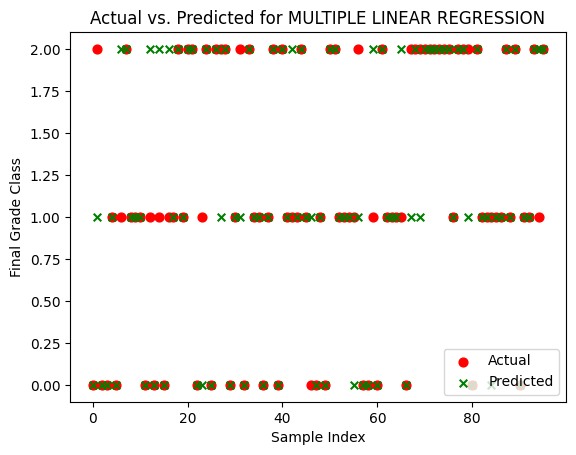

In [20]:
import matplotlib.pyplot as plt
import numpy as np
# Create a scatter plot
plt.scatter(np.arange(len(y_test)), y_test, label='Actual', marker='o',c='r',s=40)
plt.scatter(np.arange(len(y_pred_mlr)), y_pred_mlr, label='Predicted', marker='x',c='g',s=30)

plt.title('Actual vs. Predicted for MULTIPLE LINEAR REGRESSION')
plt.xlabel('Sample Index')
plt.ylabel('Final Grade Class')
plt.legend()
plt.show()

## POLYNOMIAL REGRESSION

In [21]:
polyCopy=data.copy()
x=MLRcopy.iloc[:,:-1]
y=MLRcopy.iloc[:,-1]

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
def PolynomialRegression(degree,x,y,ipf):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=52)
    polyFeatures=PolynomialFeatures(degree)
    x_poly=polyFeatures.fit_transform(x_train)
    x_test=polyFeatures.fit_transform(x_test)
    ipf=polyFeatures.fit_transform(ipf)
    model=LinearRegression()
    model.fit(x_poly,y_train)
    polyPredictions=model.predict(x_test)
    y_pred_poly = np.round(polyPredictions)
    Ploymse=mean_squared_error(y_test,y_pred_poly)
    Polyrmse= pow(Ploymse,0.5)
    PolyScore = accuracy_score(y_test,y_pred_poly)
    PolyReport = classification_report(y_test,y_pred_poly)
    pred=model.predict(ipf)
    print(f"prediction for randomly selected row: {pred[0]}")
    actualValue=logCopy.iloc[random_index,-1]
    print(f"actual value for randomly selected row: {actualValue}")
    print(f'rmse={Polyrmse}')
    print(f'score={PolyScore}')
    print(PolyReport)
    return y_pred_poly

In [23]:
print("USING DEGREE TWO")
deg2=PolynomialRegression(2,x,y,random_row)
print("-------------------------------")
print("USING DEGREE THREE")
deg3=PolynomialRegression(3,x,y,random_row)
print("-------------------------------")
print("USING DEGREE FOUR")
deg4=PolynomialRegression(4,x,y,random_row)
print("-------------------------------")

USING DEGREE TWO
prediction for randomly selected row: 1.5575577637547258
actual value for randomly selected row: 1
rmse=0.45643546458763845
score=0.7916666666666666
              precision    recall  f1-score   support

           0       0.84      0.95      0.89        22
           1       0.79      0.67      0.72        39
           2       0.76      0.83      0.79        35

    accuracy                           0.79        96
   macro avg       0.80      0.82      0.80        96
weighted avg       0.79      0.79      0.79        96

-------------------------------
USING DEGREE THREE
prediction for randomly selected row: 1.7603138983249664
actual value for randomly selected row: 1
rmse=0.7430231041719587
score=0.6041666666666666
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.65      0.77      0.71        22
         1.0       0.58      0.46      0.51        39
         2.0       0.70      0.66    

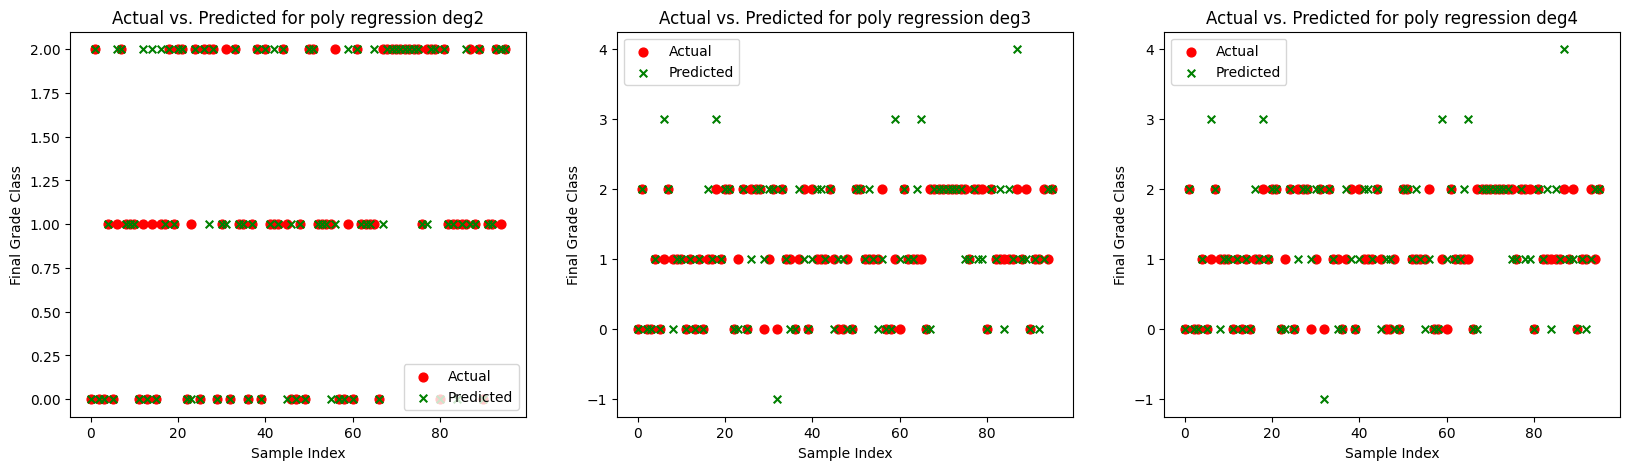

In [24]:
import matplotlib.pyplot as plt
import numpy as np
# Create a scatter plot
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.scatter(np.arange(len(y_test)), y_test, label='Actual', marker='o',c='r',s=40)
plt.scatter(np.arange(len(deg2)), deg2, label='Predicted', marker='x',c='g',s=30)
plt.title('Actual vs. Predicted for poly regression deg2')
plt.xlabel('Sample Index')
plt.ylabel('Final Grade Class')
plt.legend()

plt.subplot(1,3,2)
plt.scatter(np.arange(len(y_test)), y_test, label='Actual', marker='o',c='r',s=40)
plt.scatter(np.arange(len(deg3)), deg3, label='Predicted', marker='x',c='g',s=30)
plt.title('Actual vs. Predicted for poly regression deg3')
plt.xlabel('Sample Index')
plt.ylabel('Final Grade Class')
plt.legend()

plt.subplot(1,3,3)
plt.scatter(np.arange(len(y_test)), y_test, label='Actual', marker='o',c='r',s=40)
plt.scatter(np.arange(len(deg3)), deg3, label='Predicted', marker='x',c='g',s=30)
plt.title('Actual vs. Predicted for poly regression deg4')
plt.xlabel('Sample Index')
plt.ylabel('Final Grade Class')
plt.legend()

plt.show()

## SVM

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [26]:
scaler = StandardScaler()
scaler.fit(x)
scaled = scaler.transform(x)

In [27]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(scaled, y, test_size=0.2, random_state=52)


In [28]:
svc = SVC(kernel="linear",C=100,random_state=42,gamma=1)
svc.fit(X_train1,y_train1)
svcpred = svc.predict(X_test1)

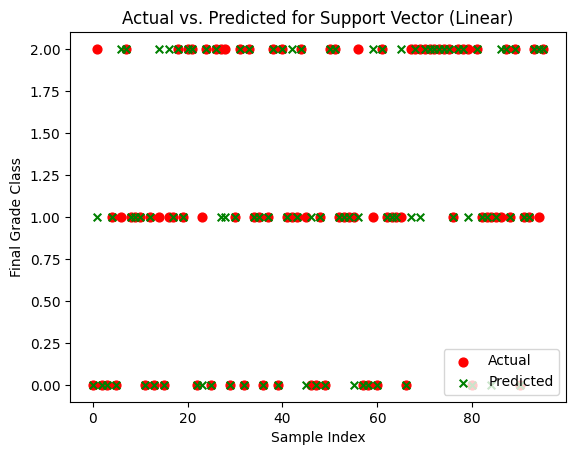

In [29]:
plt.scatter(np.arange(len(y_test)), y_test, label='Actual', marker='o',c='r',s=40)
plt.scatter(np.arange(len(svcpred)), svcpred, label='Predicted', marker='x',c='g',s=30)

plt.title('Actual vs. Predicted for Support Vector (Linear)')
plt.xlabel('Sample Index')
plt.ylabel('Final Grade Class')
plt.legend()
plt.show()

In [30]:
svc1= SVC(kernel="sigmoid",C=100,random_state=42,gamma=1)
svc1.fit(X_train1,y_train1)
svcpred1 = svc1.predict(X_test1)

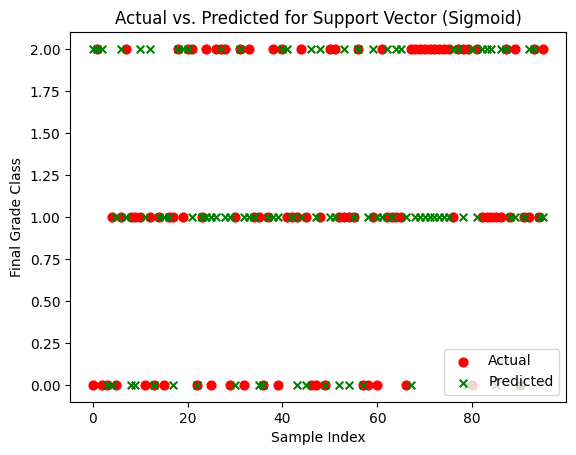

In [31]:
plt.scatter(np.arange(len(y_test)), y_test, label='Actual', marker='o',c='r',s=40)
plt.scatter(np.arange(len(svcpred1)), svcpred1, label='Predicted', marker='x',c='g',s=30)

plt.title('Actual vs. Predicted for Support Vector (Sigmoid)')
plt.xlabel('Sample Index')
plt.ylabel('Final Grade Class')
plt.legend()
plt.show()

In [32]:
svc2 = SVC(kernel="rbf",C=100,random_state=42,gamma=1)
svc2.fit(X_train1,y_train1)
svcpred2 = svc2.predict(X_test1)

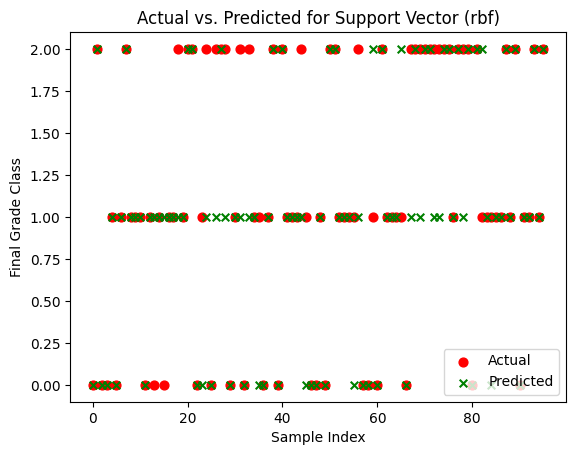

In [33]:
plt.scatter(np.arange(len(y_test)), y_test, label='Actual', marker='o',c='r',s=40)
plt.scatter(np.arange(len(svcpred2)), svcpred2, label='Predicted', marker='x',c='g',s=30)

plt.title('Actual vs. Predicted for Support Vector (rbf)')
plt.xlabel('Sample Index')
plt.ylabel('Final Grade Class')
plt.legend()
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test1, svcpred)
print(mse)
mse1 = mean_squared_error(y_test1, svcpred1)
print(mse1)
mse2 = mean_squared_error(y_test1, svcpred2)
print(mse2)


0.20833333333333334
0.8958333333333334
0.23958333333333334


In [35]:
Score_svm= accuracy_score(y_test1,svcpred)
Score_svm1= accuracy_score(y_test1,svcpred1)
Score_svm2= accuracy_score(y_test1,svcpred2)
print(Score_svm)
print(Score_svm1)
print(Score_svm2)


0.7916666666666666
0.2916666666666667
0.7604166666666666


In [36]:
print('Support Vector Classifier Linear' + '\n')
print(classification_report(y_test,svcpred))
print('\n')

Support Vector Classifier Linear

              precision    recall  f1-score   support

           0       0.84      0.95      0.89        22
           1       0.77      0.69      0.73        39
           2       0.78      0.80      0.79        35

    accuracy                           0.79        96
   macro avg       0.80      0.82      0.80        96
weighted avg       0.79      0.79      0.79        96





In [37]:
print('Support Vector Classifier Sigmoid' + '\n')
print(classification_report(y_test,svcpred1))

print('\n')

Support Vector Classifier Sigmoid

              precision    recall  f1-score   support

           0       0.35      0.32      0.33        22
           1       0.24      0.28      0.26        39
           2       0.32      0.29      0.30        35

    accuracy                           0.29        96
   macro avg       0.31      0.30      0.30        96
weighted avg       0.30      0.29      0.29        96





In [38]:
print('Support Vector Classifier Radial' + '\n')
print(classification_report(y_test,svcpred2))

print('\n')

Support Vector Classifier Radial

              precision    recall  f1-score   support

           0       0.80      0.91      0.85        22
           1       0.67      0.79      0.73        39
           2       0.88      0.63      0.73        35

    accuracy                           0.76        96
   macro avg       0.78      0.78      0.77        96
weighted avg       0.78      0.76      0.76        96





In [39]:
dt = DecisionTreeClassifier(max_depth=7, min_samples_split=4, min_samples_leaf=1, random_state=1)
dt.fit(X_train1,y_train1)
dtpred = dt.predict(X_test1)


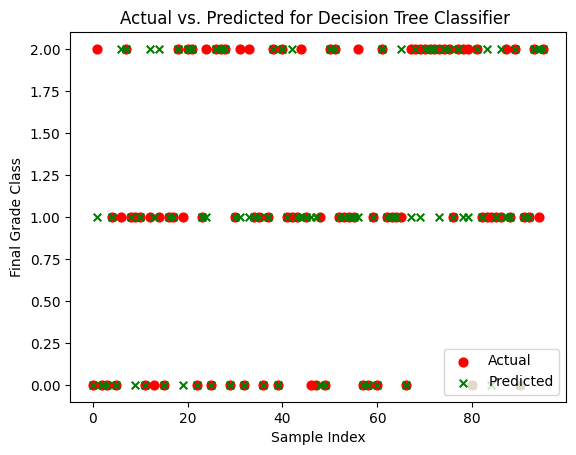

In [40]:
plt.scatter(np.arange(len(y_test)), y_test, label='Actual', marker='o',c='r',s=40)
plt.scatter(np.arange(len(dtpred)), dtpred, label='Predicted', marker='x',c='g',s=30)

plt.title('Actual vs. Predicted for Decision Tree Classifier ')
plt.xlabel('Sample Index')
plt.ylabel('Final Grade Class')
plt.legend()
plt.show()

In [41]:
mse_dt=mean_squared_error(y_test1,dtpred)
print(mse_dt)
acc_dt=accuracy_score(y_test1,dtpred)
print(acc_dt)

0.28125
0.71875


Desicion Tree Classifier

              precision    recall  f1-score   support

           0       0.83      0.86      0.84        22
           1       0.64      0.69      0.67        39
           2       0.74      0.66      0.70        35

    accuracy                           0.72        96
   macro avg       0.74      0.74      0.74        96
weighted avg       0.72      0.72      0.72        96



Confusion matrix


<Axes: >

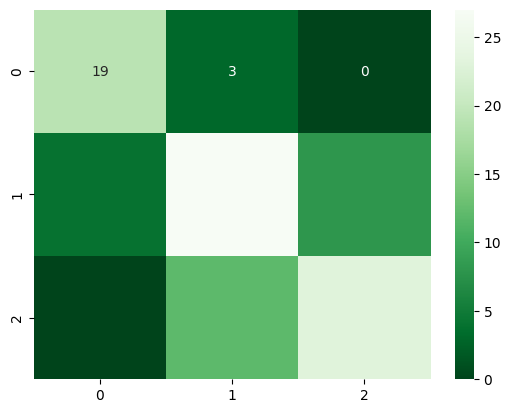

In [42]:
print('Desicion Tree Classifier' + '\n')
print(classification_report(y_test,dtpred))

print('\n')

print('Confusion matrix')
sns.heatmap(confusion_matrix(y_test,dtpred),cmap='Greens_r',annot=True,fmt='g')

In [43]:
knn = KNeighborsClassifier(n_neighbors=3,p=10)
knn.fit(X_train1,y_train1)
knnpred = knn.predict(X_test1)

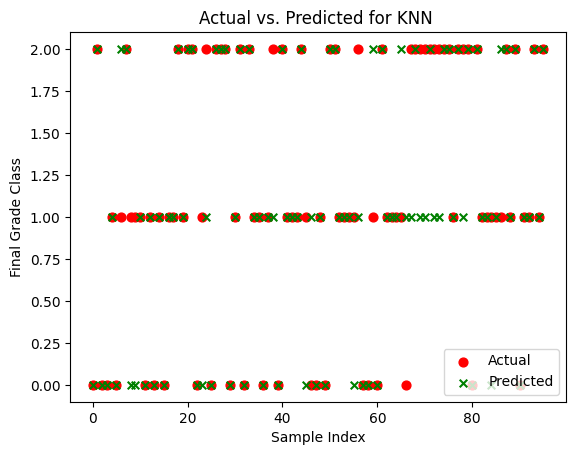

In [44]:
plt.scatter(np.arange(len(y_test)), y_test, label='Actual', marker='o',c='r',s=40)
plt.scatter(np.arange(len(knnpred)), knnpred, label='Predicted', marker='x',c='g',s=30)

plt.title('Actual vs. Predicted for KNN ')
plt.xlabel('Sample Index')
plt.ylabel('Final Grade Class')
plt.legend()
plt.show()

In [45]:
mse_knn = mean_squared_error(y_test1, knnpred)
print(mse_knn)
accuracy_knn=accuracy_score(y_test1,knnpred)
print(accuracy_knn)

0.21875
0.78125


K Nearest Neighbours

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        22
           1       0.72      0.74      0.73        39
           2       0.87      0.74      0.80        35

    accuracy                           0.78        96
   macro avg       0.79      0.80      0.79        96
weighted avg       0.79      0.78      0.78        96



Confusion matrix


<Axes: >

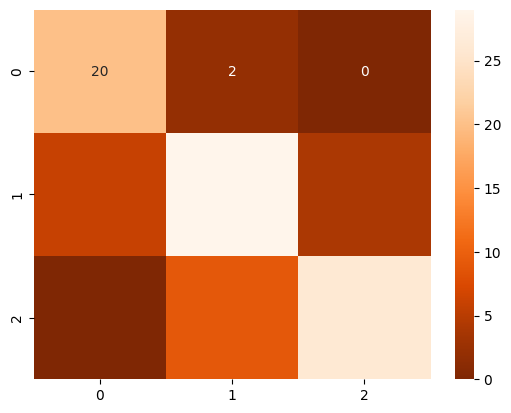

In [46]:
print('K Nearest Neighbours' + '\n')
print(classification_report(y_test,knnpred))

print('\n')

print('Confusion matrix')
sns.heatmap(confusion_matrix(y_test,knnpred),cmap='Oranges_r',annot=True,fmt='g')